This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Dealing with time series

Dealing with radar data typically means implies dealing with time series (of radar records or rain gauge observations). This article gives a brief intro on how to deal with times series and datetimes in Python.   

## The datetime module

The datetime module provides a number of types to deal with dates, times, and time intervals. 

In [1]:
import datetime as dt

There are different ways to create datetime objects.  

In [2]:
# This is now (system time)
now = dt.datetime.now()
# Just using the date
birth_van_rossum = dt.datetime(1956, 1, 31)
# Providing both date and time
first_wradlib_commit = dt.datetime(2011, 10, 26, 11, 54, 58)
# Or initialising from a string
erad_2016_begins = dt.datetime.strptime("2016-10-09 09:00:00", "%Y-%m-%d %H:%M:%S")

You can compute the difference between two datetime objects.

In [3]:
# Age of Guido van Rossum
age_van_rossum = now - birth_van_rossum
print("This is a %r object.\n" % type(age_van_rossum) )
print("It looks like this: %r" % age_van_rossum )
print("and consists of\n\t%d days,\n\t%d seconds,\n\tand %d microseconds.\n" 
      % (age_van_rossum.days, age_van_rossum.seconds, age_van_rossum.microseconds) )
# Age of wradlib
age_wradlib = now - first_wradlib_commit
# Time until (or since) beginning of ERAD 2016 OSS Short course
from_to_erad2016 = now - erad_2016_begins

print("Guido van Rossum is %d seconds old." % age_van_rossum.total_seconds())
print("wradlib's first commit was %d days ago." % age_wradlib.days)
if from_to_erad2016.total_seconds() < 0:
    print("The ERAD 2016 OSS Short course will start in %d days." % -from_to_erad2016.days )
else:
    print("The ERAD 2016 OSS Short course took place %d days ago." % from_to_erad2016.days)

This is a <class 'datetime.timedelta'> object.

It looks like this: datetime.timedelta(days=22919, seconds=30145, microseconds=25835)
and consists of
	22919 days,
	30145 seconds,
	and 25835 microseconds.

Guido van Rossum is 1980231745 seconds old.
wradlib's first commit was 2561 days ago.
The ERAD 2016 OSS Short course took place 751 days ago.


Or you can create a `datetime.timedelta` object yourself 
and add/subtract a time interval from/to a `datetime` object.
You can use any of these keywords: `days, seconds, microseconds, milliseconds, minutes, hours, weeks`,
but `datetime.timedelta` will always represent the result in `days, seconds, microseconds`.

In [4]:
# This is an interval of two minutes
print(dt.timedelta(minutes=1, seconds=60))
# And this is, too
print(dt.timedelta(minutes=2))
now = dt.datetime.now()
print("This is now: %s" % now)
print("This is two minutes before: %s" % (now - dt.timedelta(minutes=2)) )

0:02:00
0:02:00
This is now: 2018-10-31 08:22:25.072439
This is two minutes before: 2018-10-31 08:20:25.072439


The default string format of a `datetime` object corresponds to the [isoformat](https://en.wikipedia.org/wiki/ISO_8601). Using the `strftime` function, however, you can control string formatting yourself. The following example shows this feature together with other features we have learned before. The idea is to loop over time and generate corresponding string representations. We also store the `datetime` objects in a list.

In [5]:
start = dt.datetime(2016, 10, 9)
end = dt.datetime(2016, 10, 14)
interval = dt.timedelta(days=1)
dtimes = []
print("These are the ERAD 2016 conference days (incl. short courses):")
while start <= end:
    print(start.strftime("\t%A, %d. %B %Y"))
    dtimes.append(start)
    start += interval    

These are the ERAD 2016 conference days (incl. short courses):
	Sunday, 09. October 2016
	Monday, 10. October 2016
	Tuesday, 11. October 2016
	Wednesday, 12. October 2016
	Thursday, 13. October 2016
	Friday, 14. October 2016


[matplotlib](../python/mplintro.ipynb) generally understands `datetime` objects and tries to make sense of them in plots.

In [6]:
# Instead of %matplotlib inline
import matplotlib.pyplot as pl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

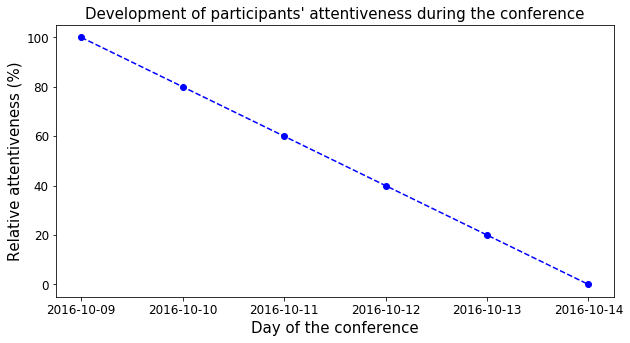

In [7]:
# Create some dummy data
level = np.linspace(100,0,len(dtimes))

# And add a time series plot
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
pl.plot(dtimes, level, "bo", linestyle="dashed")
pl.xlabel("Day of the conference", fontsize=15)
pl.ylabel("Relative attentiveness (%)", fontsize=15)
pl.title("Development of participants' attentiveness during the conference", fontsize=15)
pl.tick_params(labelsize=12)